## 합성곱 신경망의 구성요소
합성곱, 필터, 특성 맵, 패딩, 스트라이드, 풀링

### 합성곱 신경망
이미지 분류에 쓰인다.    
합성곱은 두 함수에 적용하여 새로운 함수를 만드는 수학 연산자   
   
1. 배열하나 선택하여 뒤집기: numpy.flip()    
x = [2, 8, 3, 7, 1, 2, 0, 4, 5]   
w = [2, 1, 5, 3]   
wr = [3, 5, 1, 2] (뒤집어진 배열)   
   
[2, 8, 3, 7, 1, 2, 0, 4, 5]　　　　　# 이 배열에서   
[2, 1, 5, 3]　　　　　　　　　　# 하나씩 옮겨가면서 곱하기   
2\*3 + 8\*5 + 3\*1 + 7\*2 = 63   

### 합성곱(convolution)   
유용한 특성만 드러나게 하는 것 ex) R, G, B   
인공신경망에서는 뉴런마다 입력 개수만큼 가중치가 있었다. 그리고 뉴런만큼 출력한다.   
즉, 입력개수만큼 10개의 가중치를 가지고, 1개의 출력을 만든다.   
~~질문) 합성곱을 사용하면 학습할 데이터가 늘어나나..? 그렇게 만들기 위해서 실행하나?~~

합성곱은 밀집층의 계산과 조금 다르다. 입력데이터 일부에 가중치를 곱한다.   
뉴런이 3개의 가중치를 가진다고 할 때, 10개의 입력값에 대해서는 총 8개의 출력이 만들어진다.   
즉 3개의 가중치를 가지고 8개의 출력을 만든다. -> *10개 해서 80개 출력인건가?

합성곱 신경망(convolutional neural network, CNN)에서는 완전 연결 신경망과 달리 뉴런을 '필터$^{filter}$'라고 부른다. 혹은 '커널$^{kernel}$'

합성곱은 1차원뿐만 아니라 2차원 입력에도 적용할 수 있다.
합성곱 계산을 통해 얻은 출력을 '특성 맵$^{feature map}$'이라고 부른다.   
여러 개의 필터를 사용하여 만들어진 특성맵은 순서대로 쌓인다.   
즉, (2, 2) 크기의 특성 맵을 3개 쌓으면(필터를 3개 썼다면) 3차원 배열 (2, 2, 3)이 된다.

### 케라스 합성곱 층

케라스 합성곱 층은 keras.layers 패키지 아래 클래스로 구성되어 있다. -> Conv2D


```
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')
                 # (필터의 개수, 필터의 크기, 활성화 함수)
```





#### 패딩과 스트라이드
앞 선 예시에서 (4, 4) 크기의 입력에 (3, 3) 크기의 커널을 적용, (2, 2) 크기의 특성맵을 만듦.

(valid 매개변수에 입력)
패딩: 밸리드(valid) 패딩 / 풀(full) 패딩 / 세임(same) 패딩

밸리드 패딩: 원본 배열의 원소가 합성곱 연산에 참여하는 정도가 서로 다르다. --> 기본값
풀 패딩: 원본 배열 원소의 연산 참여도가 동일하다. --> 필터의 크기 * 2만큼 출력 특성맵이 더 커지나?
세임 패딩: 출력 배열의 길이를 원본 배열의 길이와 동일하게 만든다. --> 출력 결과에 맞게 계산해 0을 붙일듯
=> 풀 패딩과 세임 패딩은 1차원 배열일 경우, 왼쪽과 오른쪽에 가상의 원소(0)를 추가

합성곱 신경망에서는 세임 패딩이 주로 사용된다.


```
keras.layers.Conv2D(10, kernel_size(3,3), activation='relu', padding='same')
```


스트라이드: 원본 배열에서 이동하는 간격(값). 기본 스트라이드는 1.

```
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)
```

(1,1)과 같이 튜플을 사용해 우측/하강 이동 크기를 달리 설정할 수 있으나, 그러는 경우는 거의 없다.   
대체로 기본값을 그대로 사용한다.   

#### 풀링(pooling) 연산

합성곱과 활성화 함수가 적용되어 특성 맵이 만들어지고,   
특성맵이 풀링 층을 통과하여 또다른 특성맵이 생성된다.   
**특성맵의 크기를 줄여준다.**   


1. max풀링: 풀링을 통과한 값 중 가장 큰 값(max)을 출력한다.
    - 이미지가 뭉개지는 현상을 방지하기 위해 이미지 데이터에서 대해서 주로 사용한다.
2. Average 풀링: 풀링을 통과한 값의 평균(average)을 출력한다.

* 풀링은 중복연산이 아니라 풀링 크기만큼 건너뛴다.   
* 풀링의 크기는 원래 데이터의 크기에 나누어 떨어지는 크기로 설정해야 한다.

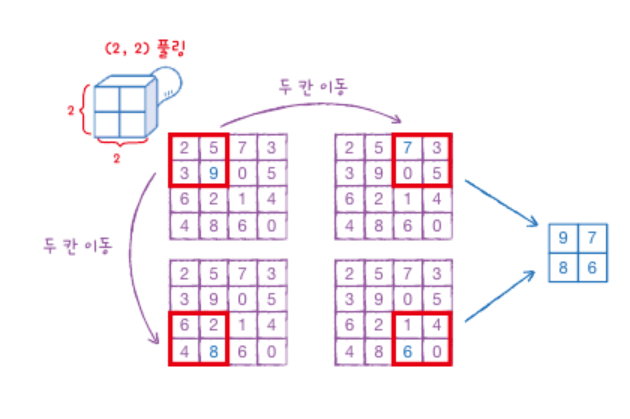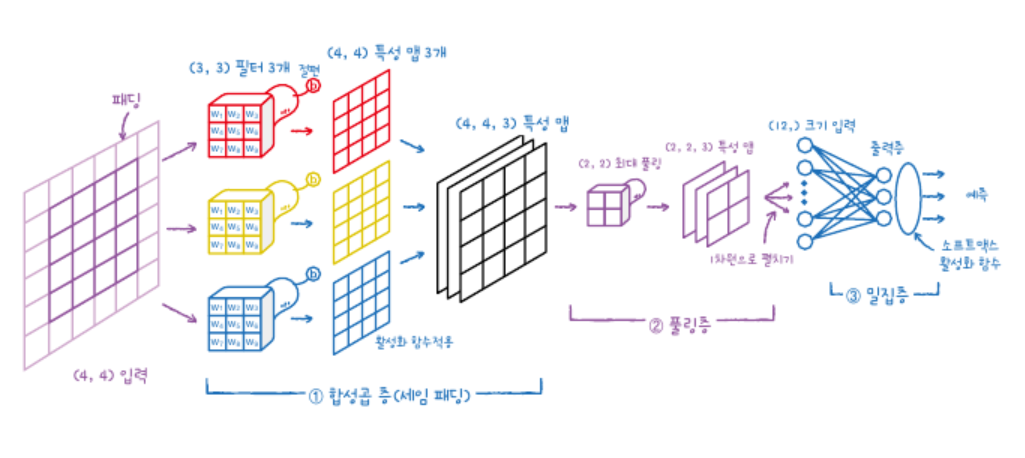

<합성곱 신경망 구조 순서>   
1. 합성곱 층: (1) 이미지 / (2) 커널(필터) => (3) 특성맵 => 활성화 함수 (ReLU) => 3차원 특성맵    
2. 풀링 층: 풀링 => 축소된 특성맵   
3. 완전 연결 층: 1차원으로 펼친 입력층 => dense층 => 출력층 => 활성화 함수 (softmax)   

* 풀링은 합성곱 층과 뚜렷이 구분되는 다른 과정이기 때문에 풀링층이라 부른다.


#### 컬러 이미지를 사용한 합성곱

하나의 컬러 이미지는 3차원으로 표현된다. (RGB)   
깊이가 있는 입력에서 합성곱을 수행하기 위해서는 커널도 깊이가 필요. - 3차원 커널.   

케라스의 합성곱 층은 항상 3차원 입력을 기대한다. 흑백 이미지일 경우, 깊이 차원이 1인 3차원 배열로 변환.   
ex) (28, 28) -> (28, 28, 1)